In [32]:
# Import required packages

import os
import sys
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten
from tensorflow.keras.utils import plot_model

In [31]:
# Import the data set
data_frame = pd.read_csv("car_prices.csv")

In [4]:
# head() prints the first 5 rows of the DataFrame
data_frame.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
# info() prints information about the DataFrame. This includes information like the number of columns and data type.
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


## Data Notes
* This data set contains columns with missing values, we'll want to cleanup the data before going further

```
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
```

In [6]:
# Drop rows with NA columns
data_frame = data_frame.dropna()

# Get DataFrame output to validate that columns have matching number of rows
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


### Output after cleanup

```
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
```

We will now plot the data to get a visual idea of the effect each feature has on the price

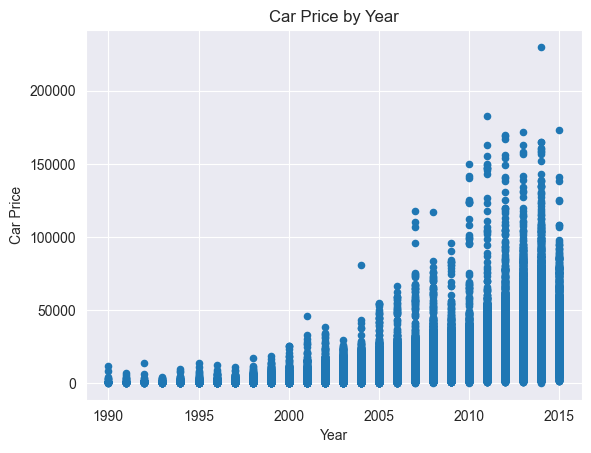

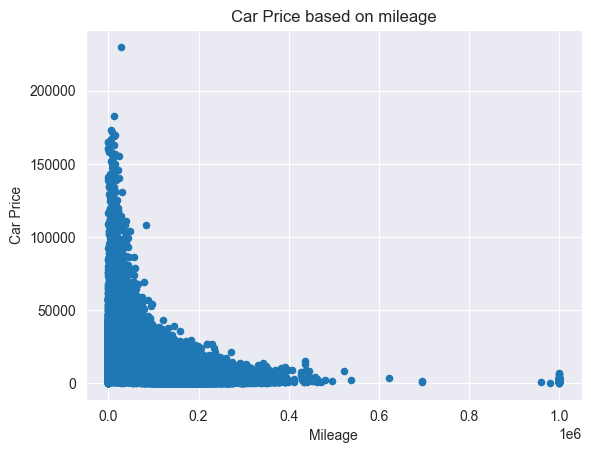

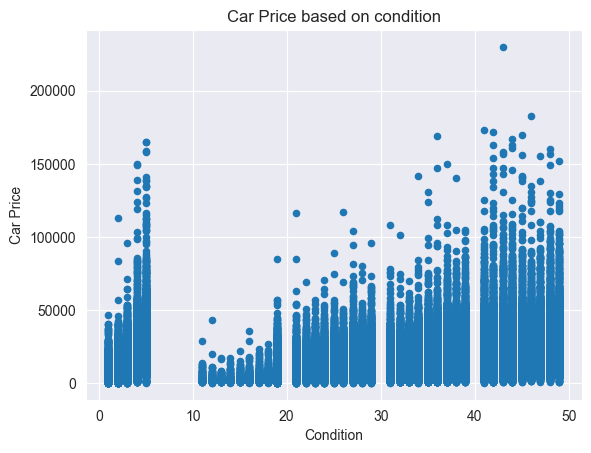

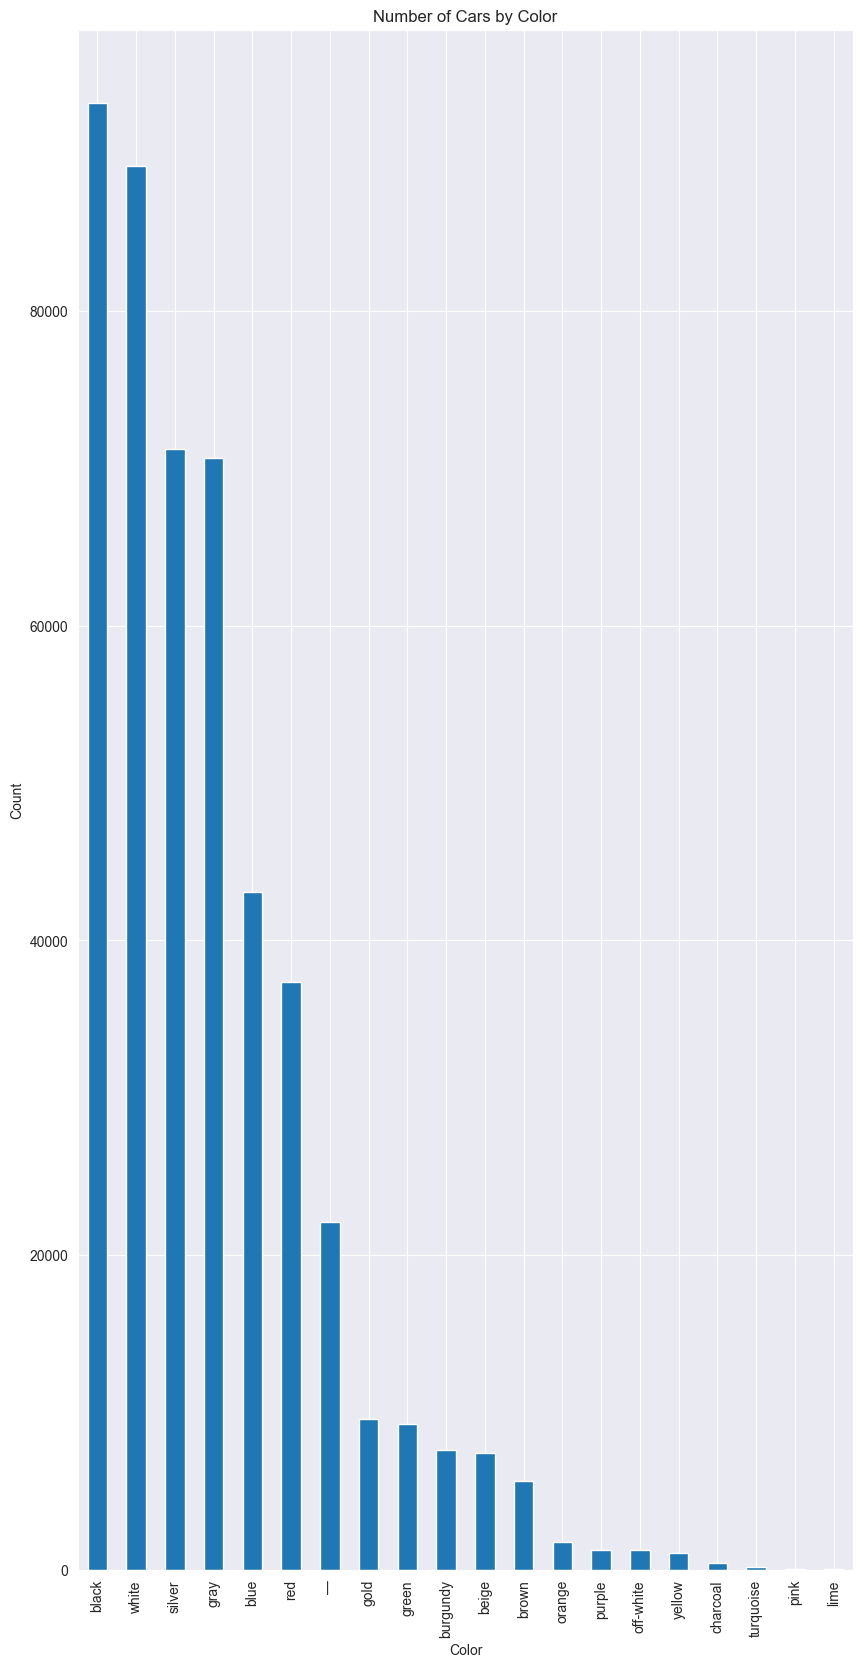

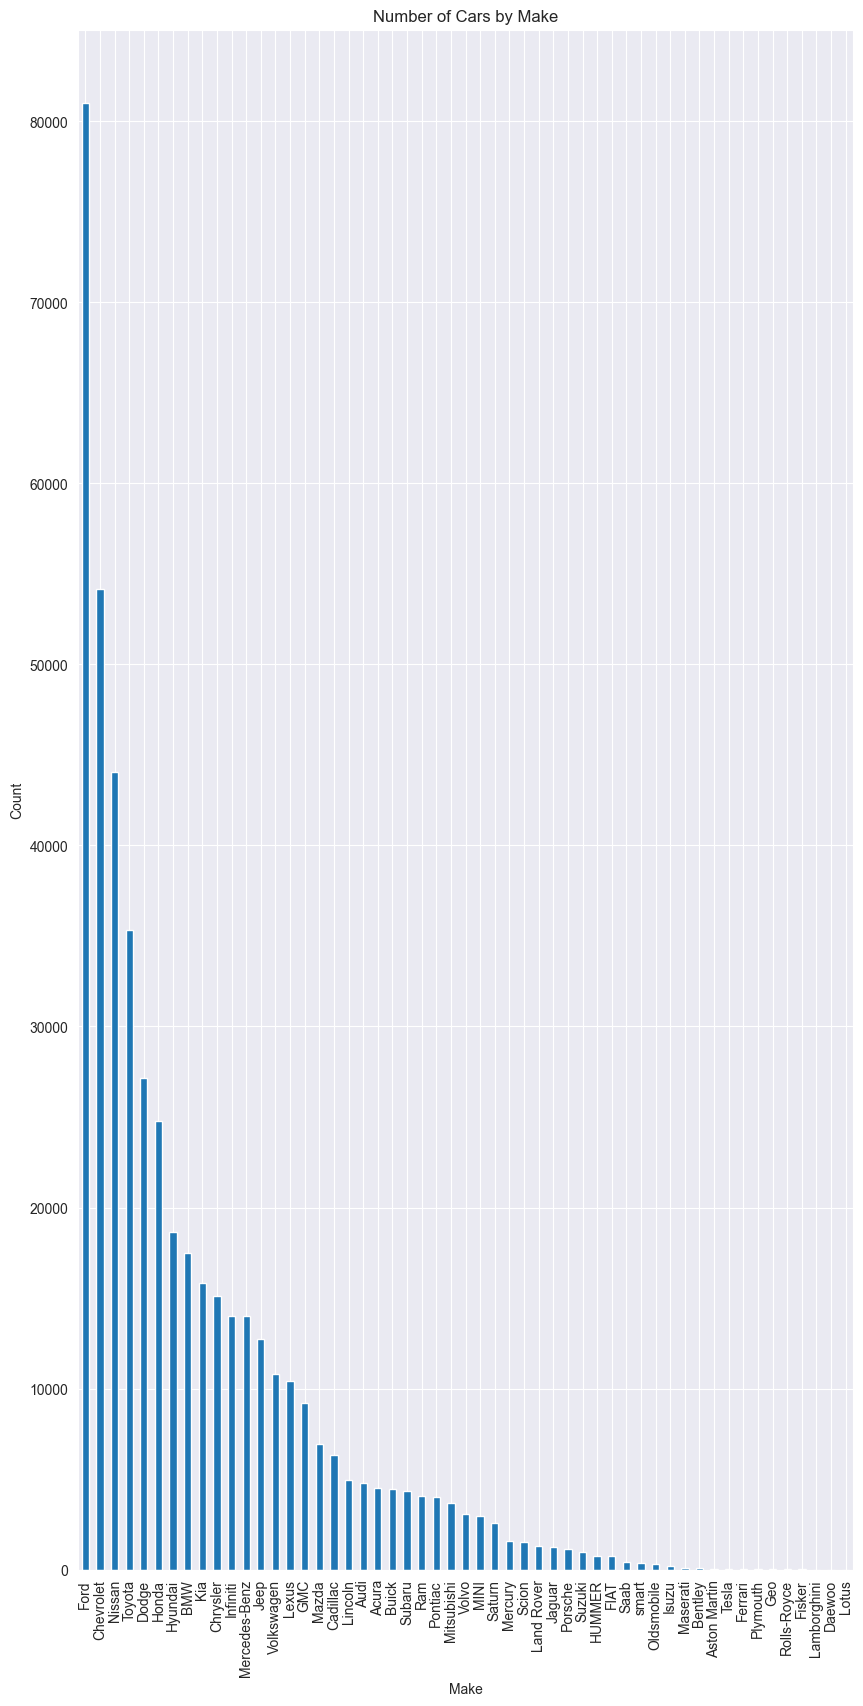

In [13]:
# Selling price based on year
data_frame.plot(kind='scatter', x='year', y='sellingprice', title="Car Price by Year", xlabel="Year",
                ylabel="Car Price")
plt.show()

# Selling price based on mileage
data_frame.plot(kind='scatter', x='odometer', y='sellingprice', title="Car Price based on mileage", xlabel="Mileage",
                ylabel="Car Price")
plt.show()

# Selling price based on condition
data_frame.plot(kind='scatter', x='condition', y='sellingprice', title="Car Price based on condition", xlabel="Condition",
                ylabel="Car Price")
plt.show()

# Number of car sold per color
data_frame.value_counts('color').plot(kind='bar', title="Number of Cars by Color", xlabel="Color",
                                     ylabel="Count", rot=90, figsize=(10, 20))
plt.show()

# Number of car sold per make
data_frame.value_counts('make').plot(kind='bar', title="Number of Cars by Make", xlabel="Make",
                                     ylabel="Count", rot=90, figsize=(10, 20))
plt.show()


In [34]:
inputs = data_frame.drop('sellingprice', axis=1)
output = data_frame.sellingprice

# Split the dataframe into a train and test sets, where we use 20% of the data for testing
X_train,X_test,y_train,y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

# Preprocess categorical features using LabelEncoder
categorical_features = ['year', 'make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])
    encoders[feature] = le

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define input layers for numerical and categorical features
num_input = Input(shape=(X_train_scaled.shape[1],))
cat_inputs = []
cat_embs = []
for feature in categorical_features:
    input_dim = len(encoders[feature].classes_)
    input_layer = Input(shape=(1,))
    embedding_layer = Embedding(input_dim=input_dim, output_dim=10)(input_layer)
    flatten_layer = Flatten()(embedding_layer)
    cat_inputs.append(input_layer)
    cat_embs.append(flatten_layer)

# Concatenate numerical and categorical features
concatenated = Concatenate()([num_input] + cat_embs)

# Create dense layers for the combined features
dense1 = Dense(128, activation='relu')(concatenated)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(1, activation='linear')(dense2)

# Create the model
model = Model(inputs=[num_input] + cat_inputs, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit([X_train_scaled] + [X_train[feature].values.reshape(-1, 1) for feature in categorical_features],
          y_train,
          epochs=10,
          batch_size=32,
          validation_data=([X_test_scaled] + [X_test[feature].values.reshape(-1, 1) for feature in categorical_features], y_test))

# Evaluate the model
loss = model.evaluate([X_test_scaled] + [X_test[feature].values.reshape(-1, 1) for feature in categorical_features], y_test)
print("Test Loss:", loss)


ValueError: y contains previously unseen labels: [1983]